# Minor Project 5th Sem

### Data extraction and Pre-Processing

In [ ]:
import pandas as pd

# read data
reviews_df = pd.read_csv("/content/drive/My Drive/data/Hotel_Reviews.csv")
# append the positive and negative text reviews
reviews_df["review"] = reviews_df["Negative_Review"] + reviews_df["Positive_Review"]
# create the label
reviews_df["is_bad_review"] = reviews_df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)
# select only relevant columns
reviews_df = reviews_df[["review", "is_bad_review"]]
reviews_df.head()

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Total no of data input
print(len(reviews_df.index))
print(len(reviews_df.columns))

515738
2


**Clean Data**

In [ ]:
# remove 'No Negative' or 'No Positive' from text
reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))
reviews_df.head()

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No real complaints the hotel was great great ...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0


In [ ]:
reviews_df.loc[[0]].review

0     I am so angry that i made this post available...
Name: review, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# return the wordnet object value corresponding to the POS tag
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))

In [ ]:
# Adding label column to review_df
reviews_df['is_bad_review'] = reviews_df['is_bad_review'].astype(str)
reviews_df['label'] = "__label__" + reviews_df['is_bad_review']
reviews_df.head()

,review,is_bad_review,review_clean,label
0,I am so angry that i made this post available...,1,angry make post available via possible site us...,__label__1
1,No real complaints the hotel was great great ...,0,real complaint hotel great great location surr...,__label__0
2,Rooms are nice but for elderly a bit difficul...,0,room nice elderly bit difficult room two story...,__label__0
3,My room was dirty and I was afraid to walk ba...,1,room dirty afraid walk barefoot floor look cle...,__label__1
4,You When I booked with your company on line y...,0,book company line show picture room think get ...,__label__0


In [ ]:
reviews_df.loc[312193]

review              Pillows
is_bad_review             0
review_clean         pillow
label            __label__0
Name: 312193, dtype: object

### Training / Validation split

**Random Sampling**

In stratified data sampling ,ratio of 0 and 1 dataset remain same in training ,testing and original dataset

In [ ]:
# Printing total no of 0 and 1 reviews
reviews_df.groupby(['label']).count()

,review,is_bad_review,review_clean
label,,,
__label__0,493457,493457,493457
__label__1,22281,22281,22281


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


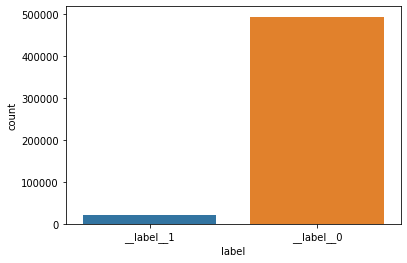

In [ ]:
#Ploting total positive and negative reviews
import seaborn as sns
sns.countplot(x="label",data=reviews_df)

In [ ]:
# ratio of total no postitive and negative reviews 

ratio = str(reviews_df['label'].value_counts()[0]/reviews_df['label'].value_counts()[1])
print("ratio of +ve to -ve dataEntry- "+ratio+":1")

ratio of +ve to -ve dataEntry- 22.14698622144428:1


In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
# splitting dataset using stratified sampling
x_train, x_val, y_train, y_val = train_test_split(reviews_df.review_clean, 
                                                  reviews_df.label, 
                                                  test_size=0.30, 
                                                  random_state=17,
                                                  stratify=reviews_df.is_bad_review.values
                                               )

In [ ]:
import pandas as pd
data_train = pd.DataFrame()
data_test  = pd.DataFrame()
data_train['label'] = y_train
data_train['text'] = x_train
data_test['label'] = y_val
data_test['text'] = x_val

In [ ]:
#Printing total no of positive and negative reviews in traning dataset

data_train.groupby(['label']).count()


,text
label,
__label__0,345419
__label__1,15597


In [ ]:
#Ratio of +ve and -ve reviews in training dataset
ratio = str(data_train['label'].value_counts()[0]/data_train['label'].value_counts()[1])
print("ratio of +ve to -ve dataEntry- "+ratio+":1")

ratio of +ve to -ve dataEntry- 22.14650253253831:1


In [ ]:
#Printing total no of +ve and -ve review in testing dataset
data_test.groupby(['label']).count()

,text
label,
__label__0,148038
__label__1,6684


In [ ]:
#Ratio of +ve and -ve reviews in testing dataset
ratio = str(data_test['label'].value_counts()[0]/data_test['label'].value_counts()[1])
print("ratio of +ve to -ve dataEntry- "+ratio+":1")

ratio of +ve to -ve dataEntry- 22.148114901256733:1


In [ ]:
# printing total training and testing dataset
print(len(x_train))
print(len(x_val))
print(len(y_train))
print(len(y_val))

361016
154722
361016
154722


In [ ]:
# copying training dataset to a different txt file for model training purpose
data_train.to_csv('Train_data.txt',sep='\t', index=None, header=None)

In [ ]:
# copying testing dataset to a different txt file for model training purpose
data_test.to_csv('Test_data.txt' ,sep='\t', index=None, header=None)

# Finding sentiment score - Part 1 (Minor)
Finding sentiment score with word embedding technique of fast text

In [ ]:
# Installing fasttext
!git clone https://github.com/facebookresearch/fastText.git


Cloning into 'fastText'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 3854 (delta 1), reused 7 (delta 1), pack-reused 3840
Receiving objects: 100% (3854/3854), 8.22 MiB | 10.10 MiB/s, done.
Resolving deltas: 100% (2414/2414), done.


In [ ]:
cd fastText/

/content/fastText/fastText


In [ ]:
!pip install .

Processing /content/fastText/fastText
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3005968 sha256=3b87246c0de0ebf71e6805505433fa888b7c2ec824a037613b991a4232892d08
  Stored in directory: /tmp/pip-ephem-wheel-cache-xi7h7ir2/wheels/f4/6f/d2/9cf630817d81c6cb62a6d0a79f5272a48f5f3ac1f3385c9c47
Successfully built fasttext
  Found existing installation: fasttext 0.9.2
    Uninstalling fasttext-0.9.2:
      Successfully uninstalled fasttext-0.9.2


In [ ]:
import fasttext as fastText #successfully installed

**Classifiying between 0 and 1 with fast Text**

Supervised Learning method of fastText

In [ ]:
hyper_params = {"lr": 0.01,
                "epoch": 20,
                "wordNgrams": 2,
                "dim": 20}     
                       
# Train the model.
model = fastText.train_supervised(input="/content/drive/My Drive/Train_data.txt", **hyper_params)
print("Model trained with the hyperparameter \n {}".format(hyper_params))

Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}


In [ ]:
model_acc_training_set = model.test("/content/drive/My Drive/Train_data.txt")
model_acc_validation_set = model.test("/content/drive/My Drive/Test_data.txt")
        
# DISPLAY ACCURACY OF TRAINED MODEL
text_line = str(hyper_params) + ",accuracy:" + str(model_acc_training_set[1])  + ",validation:" + str(model_acc_validation_set[1]) + '\n' 
print(text_line)

{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20},accuracy:0.9764719569215768,validation:0.9621320820568503



In [ ]:
# Predict
model.predict(['this player is so bad'])

([['__label__0']], [array([0.80550945], dtype=float32)])

In [ ]:
#Save model
model.save_model("/content/drive/My Drive/hotel_review_classifier" + ".ftz")

### Using model to classify text and predict score


In [ ]:
# load model
model = fastText.load_model("/content/drive/My Drive/hotel_review_classifier.ftz")

In [ ]:
# Classifying text with fastText model
model.predict(['I am so angry that i made this post available..'])

([['__label__0']], [array([0.83670044], dtype=float32)])

### USing text Blob to find score

In [ ]:
# Using text blob for finding score

class TextBlobSentiment():
    """Predict fine-grained sentiment classes using TextBlob."""
    def __init__(self, model_file: str=None) -> None:
        super().__init__()

    def score(self, text: str) -> float:
        # pip install textblob
        from textblob import TextBlob
        return TextBlob(text).sentiment.polarity

In [ ]:
obj = TextBlobSentiment()
score = obj.score('anger fear disgust')
print(score)

-0.7


**Output dataframe**

In [ ]:
import pandas as pd
test_data = pd.read_csv('/content/drive/My Drive/Test_data.txt',sep=' ',names=["label_isNeg","text"])

In [ ]:
# Testing Datset
test_data.head()

,label_isNeg,text
0,__label__0,negative location good room clean good size
1,__label__1,booked hotel people business trip comment retu...
2,__label__0,negative star value situate perfect part city ...
3,__label__0,negative room bed great staff great thomas liz...
4,__label__0,problem noisy ventilator switch sleep ear plug...


In [ ]:
# Predict Sentiment using fast Text model

# line by line, you make the predictions and store them in a list
predictions=[]
for line in test_data['text']:
    pred_label=model.predict(str(line))[0][0]
    predictions.append(pred_label)

In [ ]:
test_data['pred_isNeg'] = predictions

In [ ]:
# Output 5 random data
test_data.sample(n = 5)

,label_isNeg,text,pred_isNeg,score
97700,__label__0,light bedroom bathroom terrible really hard se...,__label__0,-0.048611
13052,__label__0,nothing room breakfast mini bar,__label__0,0.000000
75910,__label__0,room book hadnt clean bed change room tire dat...,__label__1,0.455556
54159,__label__0,bed nice comfy big get lost spa good well hote...,__label__0,0.420000
105782,__label__0,pillow croissant,__label__0,0.000000


In [ ]:
# Finding total negative and positive data in OUTPUT
test_data.groupby(['pred_isNeg']).count()

,label_isNeg,text,score
pred_isNeg,,,
__label__0,149019,148979,149019
__label__1,5703,5703,5703


In [ ]:
# Predict using Text Blob Analysis
# line by line, you make the predictions and store them in a list
scores=[]
for line in test_data['text']:
    score=obj.score(str(line))
    scores.append(score)

In [ ]:
test_data['score'] = scores

**FINAL OUTPUT**

In [ ]:
test_data.sample(n = 10)

,label_isNeg,text,pred_isNeg,score
146881,__label__0,duvet cover inside night espresso coffee avail...,__label__0,0.525000
82633,__label__0,quite walk get centre barcelona however metro ...,__label__0,0.566667
116090,__label__0,negative stay heat wave air condition excellent,__label__0,0.350000
102160,__label__0,breakfast staff nice helpful room modern nice,__label__0,0.466667
127098,__label__0,maybe unlucky toilet smell bit good location f...,__label__0,0.422222
135826,__label__0,negative everything amaze would consider stay ...,__label__0,0.100000
117390,__label__0,service brasserie poor friend meet lunch hotel...,__label__0,0.011111
10768,__label__0,size room far smalno positive,__label__0,0.163636
102686,__label__0,price park euros instead include bad shower go...,__label__0,0.266667
80555,__label__0,good nothing bad arrive hotel receptionist guy...,__label__0,0.383333


In [ ]:
#Save final data in csv form
test_data.to_csv('/content/drive/My Drive/minor_output.csv',index=None); # Saving the final output

### Confusion matrix,Recall,Precision and F1 Score

In [ ]:
df = pd.read_csv("/content/drive/My Drive/minor_output.csv")
df.head()

,label_isNeg,text,pred_isNeg,score
0,__label__0,negative location good room clean good size,__label__0,0.366667
1,__label__1,booked hotel people business trip comment retu...,__label__0,0.224242
2,__label__0,negative star value situate perfect part city ...,__label__0,0.350000
3,__label__0,negative room bed great staff great thomas liz...,__label__0,0.660000
4,__label__0,problem noisy ventilator switch sleep ear plug...,__label__0,1.000000


In [ ]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

actual = df['label_isNeg']
predicted = df['pred_isNeg'] 
results = confusion_matrix(actual, predicted) 

In [ ]:
# Printing the value
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted) )
print ('Report : ')
print (classification_report(actual, predicted) )

Confusion Matrix :
[[144576   3462]
 [  4443   2241]]
Accuracy Score : 0.9489083646798775
Report : 
              precision    recall  f1-score   support

  __label__0       0.97      0.98      0.97    148038
  __label__1       0.39      0.34      0.36      6684

    accuracy                           0.95    154722
   macro avg       0.68      0.66      0.67    154722
weighted avg       0.95      0.95      0.95    154722



 # LDA (Part-2)
Finding important words/tags with topic modelling method (LDA)

In [ ]:
# Cleaned data
reviews_df["review_clean"].head()

0    angry make post available via possible site us...
1    real complaint hotel great great location surr...
2    room nice elderly bit difficult room two story...
3    room dirty afraid walk barefoot floor look cle...
4    book company line show picture room think get ...
Name: review_clean, dtype: object

**Exploratory Analysis**

To verify whether the preprocessing happened correctly, we’ll make a word cloud using the wordcloud package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.

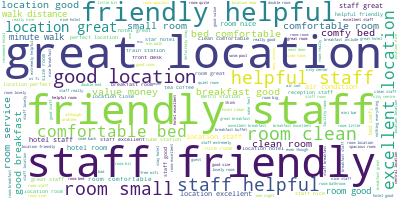

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(reviews_df["review_clean"].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

**Prepare the text for LDA Analysis**
   
Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by converting the documents into a simple vector representation (Bag of Words BOW). Next, we will convert a list of titles into lists of vectors, all with length equal to the vocabulary.

We’ll then plot the ten most frequent words based on the outcome of this operation (the list of document vectors). As a check, these words should also occur in the word cloud.

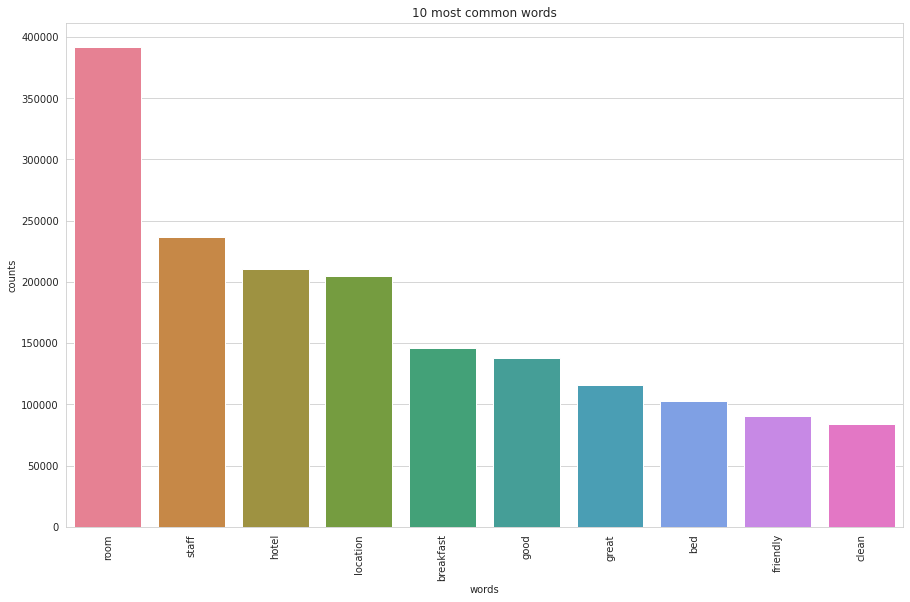

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(reviews_df["review_clean"])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

**LDA Training model**

To keep things simple, we will only tweak the number of topic parameters.

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 15

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
room small location air good window noisy staff clean hot condition breakfast bathroom nice open

Topic #1:
breakfast staff bar service food good room restaurant location check reception excellent nice drink great

Topic #2:
hotel book pay room park charge price check car free stay day extra card breakfast

Topic #3:
room bathroom shower location good wifi work tv door toilet noise clean floor light breakfast

Topic #4:
view room great pool nice hotel love bed spa bar location like really area amaze

Topic #5:
room hotel staff time night ask day check stay reception leave come make like say

Topic #6:
coffee room tea hotel water lovely free bar make machine bottle complimentary stay tower facility

Topic #7:
staff location friendly helpful hotel great room stay excellent clean breakfast good perfect nice comfortable

Topic #8:
bed room comfortable location good staff comfy breakfast clean hotel small great bathroom size nice

Topic #9:
location walk sta